<h1>Stroke Prediction Model</h1>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2670,4727,Female,33.00,0,0,Yes,Govt_job,Rural,81.00,30.2,formerly smoked,0
804,18616,Female,41.00,0,0,Yes,Private,Urban,82.20,23.9,Unknown,0
4293,69222,Male,0.24,0,0,No,children,Urban,57.09,19.4,Unknown,0
2488,8579,Female,2.00,0,0,No,children,Rural,89.72,17.8,Unknown,0
707,72882,Male,47.00,0,0,Yes,Private,Rural,75.30,25.0,formerly smoked,0


<h2>Initial Data Exploration and Cleaning</h2>

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [7]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [8]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [9]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [10]:
df.drop(columns = ['id'],inplace=True)

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h2>Model Preparation and Data Visualization</h2>

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['stroke']),df['stroke'],test_size = 0.3,random_state=42)

In [13]:
X_train.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3897,Male,4.0,0,0,No,children,Rural,90.42,16.2,Unknown
576,Male,29.0,0,0,No,Private,Urban,207.58,22.8,smokes


In [14]:
X_test.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,Unknown
4478,Male,40.0,0,0,Yes,Self-employed,Rural,65.29,28.3,never smoked


In [15]:
Y_train.head(2)

3897    0
576     0
Name: stroke, dtype: int64

In [16]:
Y_test.head(2)

4688    0
4478    0
Name: stroke, dtype: int64

<Axes: xlabel='bmi', ylabel='Count'>

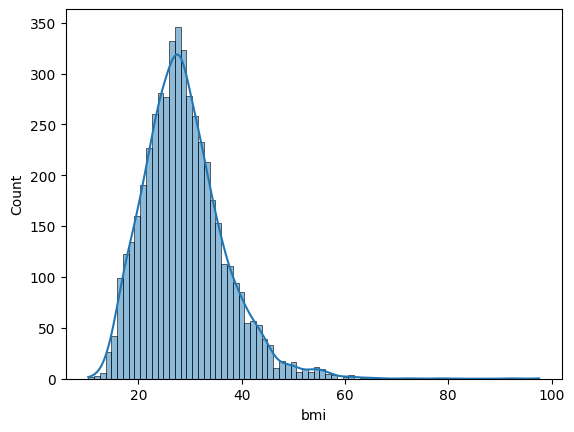

In [17]:
import seaborn as sns
sns.histplot(df['bmi'], kde=True)

<h2>Column Tranformation and Pipeline Creation</h2>
<h3>(Simple Imputing,Encoding Catagorical Data,Feature Selection,Decision Tree Classifier)</h3>

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Define transformations
ohe_cols = [0, 5, 9]  # 'gender', 'work_type', 'smoking_status'
ord_cols = [4, 6]     # 'ever_married', 'Residence_type'
bmi_col  = [8]        # 'bmi'

preprocessor = ColumnTransformer([
    ('bmi_imputer', SimpleImputer(strategy='median'), bmi_col),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ohe_cols),
    ('ordinal', OrdinalEncoder(categories=[['No', 'Yes'], ['Rural', 'Urban']]), ord_cols)
], remainder='passthrough')  # Keep all other columns


In [36]:
from sklearn.feature_selection import SelectKBest,chi2

trf4 = SelectKBest(score_func=chi2,k=8)

In [38]:
from sklearn.tree import DecisionTreeClassifier

trf5 = DecisionTreeClassifier()

pipe = Pipeline([
    ('preprocess', preprocessor),
    ('feature_select', trf4),
    ('model', trf5)
])

In [39]:
from sklearn import set_config
set_config(display='diagram')

In [40]:
# from sklearn.pipeline import make_pipeline

# pipe=make_pipeline(trf1,trf2,trf3,trf4,trf5)

pipe.fit(X_train,Y_train)

,steps,"[('preprocess', ...), ('feature_select', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bmi_imputer', ...), ('onehot', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
Y_pred = pipe.predict(X_test)

In [42]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1533,))

<h2>Result</h2>

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9008480104370515

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, Y_train, cv=5, scoring='accuracy').mean()

np.float64(0.9183705121693947)

<h2>Exporting Pipeline</h2>

In [46]:
import os

os.makedirs('models',exist_ok=True)

In [47]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))